In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

sampling_rate = 44100

from scipy.ndimage.filters import maximum_filter
from scipy.ndimage.morphology import (generate_binary_structure,
                                      binary_erosion)
from scipy.ndimage.morphology import iterate_structure

In [8]:
import librosa
data, sr = librosa.load('Daft_Punk.wav')

NoBackendError: 

In [5]:
plt.plot(data)
plt.show()

NameError: name 'data' is not defined

In [12]:
specgram, freqs, times = mlab.specgram(data, NFFT=4096, Fs=sampling_rate, noverlap=int(4096 / 2))
specgram[specgram == 0] = 1e-6

In [18]:
specgram

array([[2.06767342e-12, 3.58604981e-06, 3.40930318e-07, ...,
        1.00000000e-06, 1.00000000e-06, 1.00000000e-06],
       [3.09470101e-12, 7.27359149e-06, 8.02791016e-06, ...,
        1.00000000e-06, 1.00000000e-06, 1.00000000e-06],
       [3.47527818e-12, 6.46808639e-06, 7.11346736e-06, ...,
        1.00000000e-06, 1.00000000e-06, 1.00000000e-06],
       ...,
       [5.68824563e-20, 6.41329164e-15, 1.75414781e-14, ...,
        1.00000000e-06, 1.00000000e-06, 1.00000000e-06],
       [2.83090257e-20, 6.70087562e-15, 1.03473257e-14, ...,
        1.00000000e-06, 1.00000000e-06, 1.00000000e-06],
       [5.37427740e-22, 3.38648705e-15, 1.07359920e-16, ...,
        1.00000000e-06, 1.00000000e-06, 1.00000000e-06]])

In [19]:
freqs

array([0.00000000e+00, 1.07666016e+01, 2.15332031e+01, ...,
       2.20284668e+04, 2.20392334e+04, 2.20500000e+04])

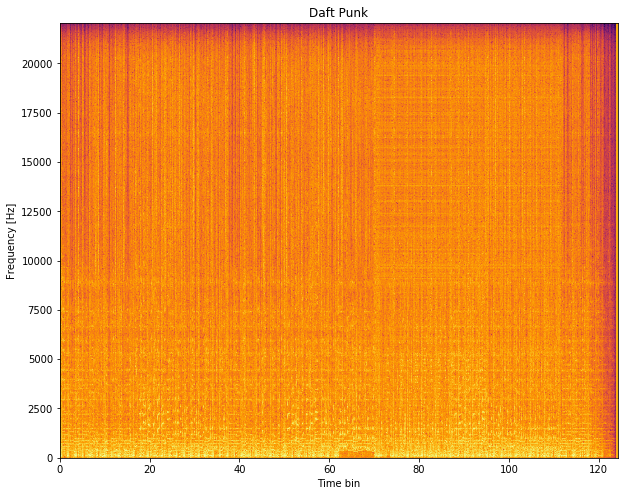

In [20]:
fig1 = plt.figure(figsize=(10, 8), facecolor='white')
extent = 0, np.amax(times), freqs[0], freqs[-1] #data coord of bounding box

Z = 10.0 * np.log10(specgram)
Z = np.flipud(Z)

plt.imshow(Z, cmap='inferno', extent=extent)
plt.xlabel('Time bin')
plt.ylabel('Frequency [Hz]')
plt.title('Daft Punk')
plt.axis('auto')

ax = plt.gca() #get current axes
ax.set_xlim([0, extent[1]])
ax.set_ylim([freqs[0], freqs[-1]])

plt.show()

In [60]:
#90% cutoff threshold to remove noise
def find_ninety_C_k(spec_gram):
    spec_gram = spec_gram[spec_gram != 0] #remove 0's
    specgram_flattened = spec_gram.flatten() #returns copy of orig
    specgram_sorted = np.sort(np.log(np.abs(specgram_flattened)))
    specgram_length = len(specgram_sorted)
    
    ninety_index = int(0.9 * specgram_length)
    ninety_C_k = specgram_sorted[ninety_index]
    return ninety_C_k

In [61]:
def spectrogram_to_peaks(specgram, freqs, times):
    fp = generate_binary_structure(2,1)
    fp = iterate_structure(fp, 20)
    background_threshold = find_ninety_C_k(specgram)
    peaks = ((specgram == maximum_filter(specgram, footprint = fp) ) & (specgram > background_threshold))
    return peaks

In [62]:
peaks_array = spectrogram_to_peaks(specgram, freqs, times)
peaks_where = np.where(peaks_array)
x = peaks_where[0]
y = peaks_where[1]

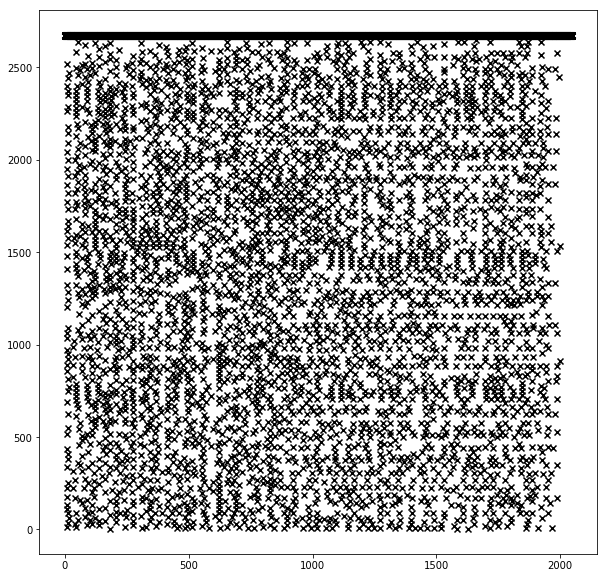

In [68]:
fig2 = plt.figure(figsize=(10, 10), facecolor='white')
plt.scatter(x, y, marker='x',color='black')
plt.show()

In [77]:
specgram.shape

(2049, 2676)